# Завдання

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;  
кількість нейронів;  
функції активації;  
кількість епох;  
розмір батчу;  
вибір оптимізатора;  
різні техніки регуляризації і т.д.  

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

In [1]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-12-10 16:31:35.386116: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    
    epochs = range(1, len(history_dict['accuracy']) + 1)
    
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
optimizer_list = [
    keras.optimizers.Nadam,
    keras.optimizers.Adam,
    keras.optimizers.AdamW,
    keras.optimizers.Adamax,
    keras.optimizers.Lion,
    keras.optimizers.RMSprop
]

/Users/lena/env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.6242 - loss: 1.0446 - val_accuracy: 0.8373 - val_loss: 0.4336
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8495 - loss: 0.4218 - val_accuracy: 0.8593 - val_loss: 0.3841
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.8687 - loss: 0.3635 - val_accuracy: 0.8745 - val_loss: 0.3484
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.8792 - loss: 0.3272 - val_accuracy: 0.8774 - val_loss: 0.3460
Epoch 5/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.8831 - loss: 0.3142 - val_accuracy: 0.8656 - val_loss: 0.3612
Epoch 6/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.8868 - loss: 0.3025 - val_accuracy: 0.8803 - val_loss: 0.3418
Epoch 7/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.8953 - loss: 0.2809 - val_accuracy: 0.8798 - val_loss: 0.3321
Epoch 8/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9007 - loss: 0.2696 - val_accuracy: 0.8754 - v

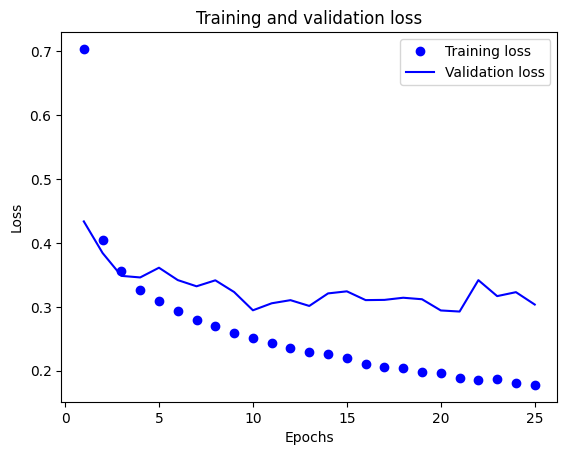

Accurancy on test data: 89.51%
Loss on test data: 34.08%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9490 - loss: 0.1348
Accurancy on train data: 93.96%
Loss on train data: 16.75%
Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.6531 - loss: 0.9617 - val_accuracy: 0.8362 - val_loss: 0.4388
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.8443 - loss: 0.4283 - val_accuracy: 0.8560 - val_loss: 0.3965
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8636 - loss: 0.3750 - val_accuracy: 0.8700 - val_loss: 0.3628
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8697 - loss: 0.3553 - val_accuracy: 0.8706 - val_loss: 0.3478
Epoch 5/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.8783 - loss: 0.3263 - val_accuracy: 0.8766 - val_loss: 0.3383
Epoch 6/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8857 - loss: 0.3148 - val_accuracy: 0.8717 - val_loss: 0.3482
Epoch 7/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms

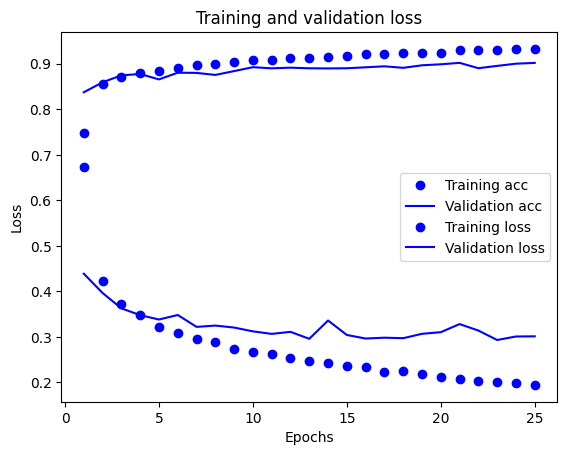

Accurancy on test data: 89.26%
Loss on test data: 33.12%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9392 - loss: 0.1578
Accurancy on train data: 93.25%
Loss on train data: 18.37%
Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.6476 - loss: 0.9925 - val_accuracy: 0.8440 - val_loss: 0.4249
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8414 - loss: 0.4399 - val_accuracy: 0.8589 - val_loss: 0.3905
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.8601 - loss: 0.3918 - val_accuracy: 0.8681 - val_loss: 0.3587
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.8732 - loss: 0.3461 - val_accuracy: 0.8622 - val_loss: 0.3844
Epoch 5/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8769 - loss: 0.3357 - val_accuracy: 0.8832 - val_loss: 0.3287
Epoch 6/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8865 - loss: 0.3105 - val_accuracy: 0.8852 - val_loss: 0.3233
Epoch 7/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 85m

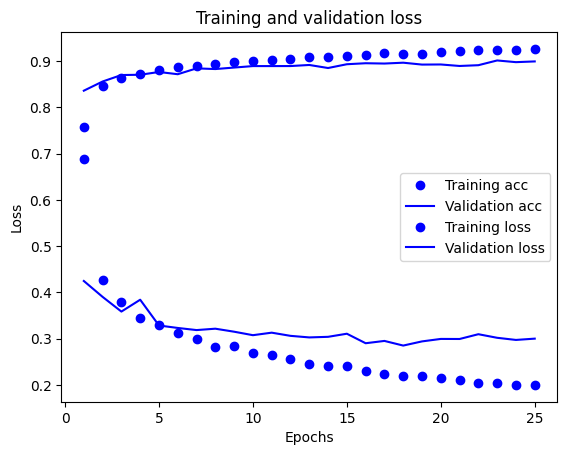

Accurancy on test data: 89.21%
Loss on test data: 33.23%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9374 - loss: 0.1628
Accurancy on train data: 93.00%
Loss on train data: 18.89%
Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.6383 - loss: 1.0286 - val_accuracy: 0.8362 - val_loss: 0.4582
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8350 - loss: 0.4708 - val_accuracy: 0.8618 - val_loss: 0.3904
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.8527 - loss: 0.4120 - val_accuracy: 0.8622 - val_loss: 0.3737
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.8658 - loss: 0.3734 - val_accuracy: 0.8735 - val_loss: 0.3511
Epoch 5/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.8737 - loss: 0.3530 - val_accuracy: 0.8797 - val_loss: 0.3458
Epoch 6/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.8780 - loss: 0.3321 - val_accuracy: 0.8767 - val_loss: 0.3396
Epoch 7/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms

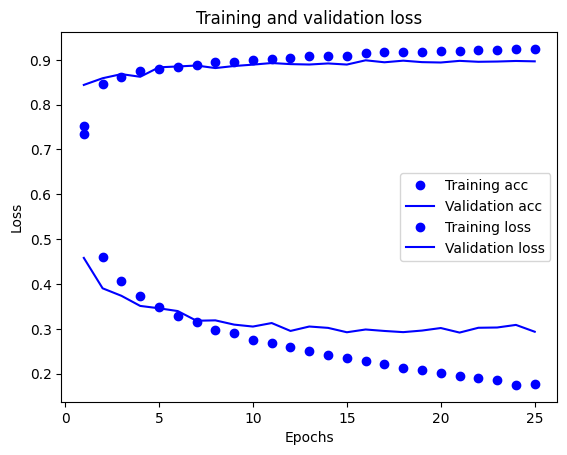

Accurancy on test data: 89.24%
Loss on test data: 32.64%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9482 - loss: 0.1377
Accurancy on train data: 93.93%
Loss on train data: 16.74%
Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.5905 - loss: 1.1190 - val_accuracy: 0.8480 - val_loss: 0.4232
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8471 - loss: 0.4256 - val_accuracy: 0.8685 - val_loss: 0.3713
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.8656 - loss: 0.3738 - val_accuracy: 0.8739 - val_loss: 0.3533
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.8724 - loss: 0.3492 - val_accuracy: 0.8776 - val_loss: 0.3460
Epoch 5/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.8778 - loss: 0.3412 - val_accuracy: 0.8774 - val_loss: 0.3320
Epoch 6/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.8805 - loss: 0.3261 - val_accuracy: 0.8792 - val_loss: 0.3328
Epoch 7/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms

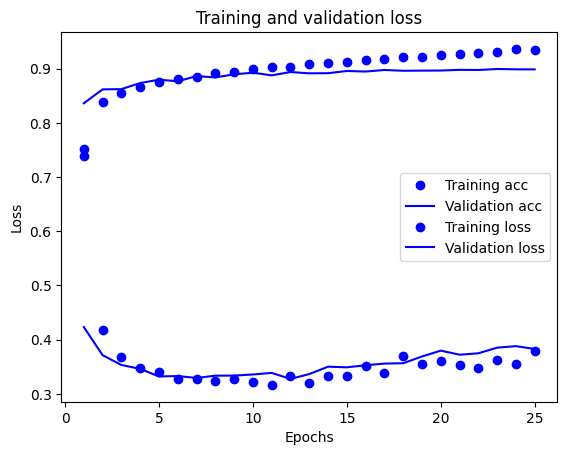

Accurancy on test data: 86.27%
Loss on test data: 39.46%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8968 - loss: 0.2732
Accurancy on train data: 89.36%
Loss on train data: 29.35%
Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.5297 - loss: 1.2791 - val_accuracy: 0.6793 - val_loss: 0.8659
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.7841 - loss: 0.5875 - val_accuracy: 0.8244 - val_loss: 0.4674
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.8208 - loss: 0.4946 - val_accuracy: 0.7991 - val_loss: 0.5333
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8354 - loss: 0.4458 - val_accuracy: 0.8252 - val_loss: 0.4941
Epoch 5/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.8440 - loss: 0.4174 - val_accuracy: 0.8611 - val_loss: 0.3919
Epoch 6/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.8573 - loss: 0.3829 - val_accuracy: 0.8391 - val_loss: 0.4459
Epoch 7/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms

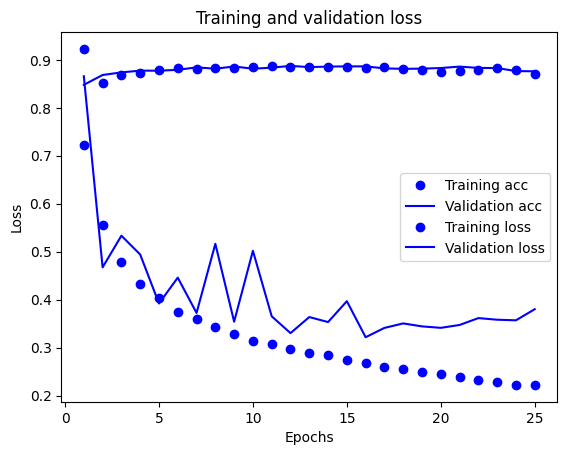

Accurancy on test data: 86.93%
Loss on test data: 40.27%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9067 - loss: 0.2363
Accurancy on train data: 90.10%
Loss on train data: 26.38%


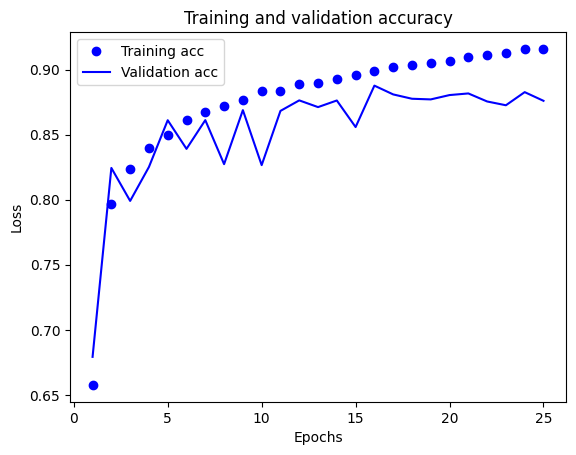

In [6]:
for opt in optimizer_list:
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.1),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=opt(learning_rate=0.001),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    history = model.fit(x_train, y_train, epochs=25, batch_size=556, validation_split=0.2, verbose=1)
    
    print(opt.__name__)
    plot_history(history)
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Accurancy on test data: {test_accuracy:.2%}")
    print(f"Loss on test data: {test_loss:.2%}")
    
    train_loss, train_acc = model.evaluate(x_train, y_train)
    print(f'Accurancy on train data: {train_acc:.2%}')
    print(f'Loss on train data: {train_loss:.2%}')